Epoch 0: Accuracy=0.45


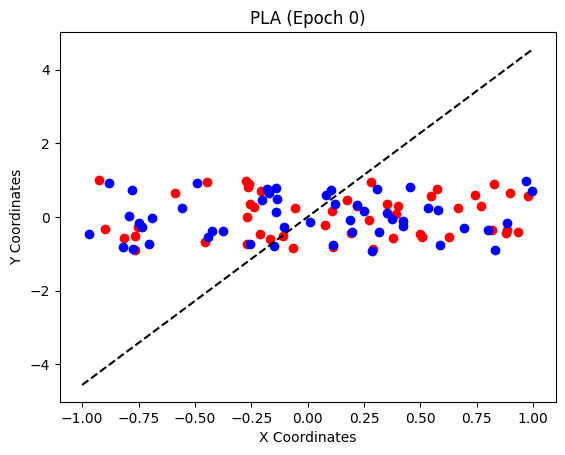

Epoch 1: Accuracy=0.52


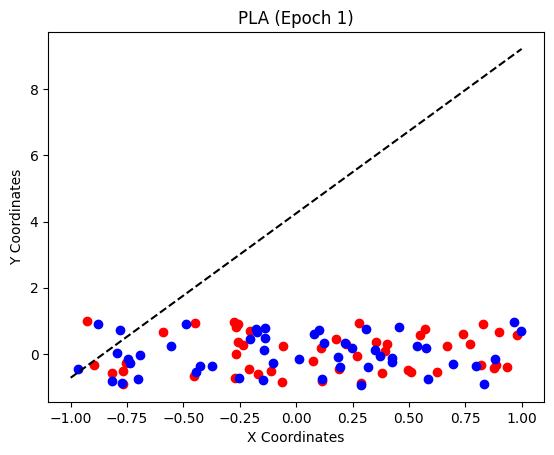

Epoch 2: Accuracy=0.5


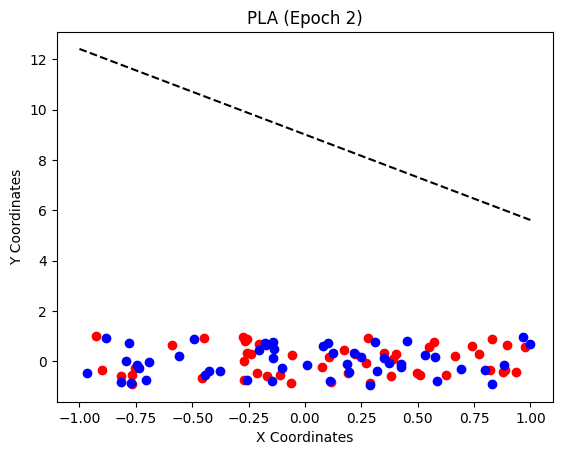

Epoch 3: Accuracy=0.53


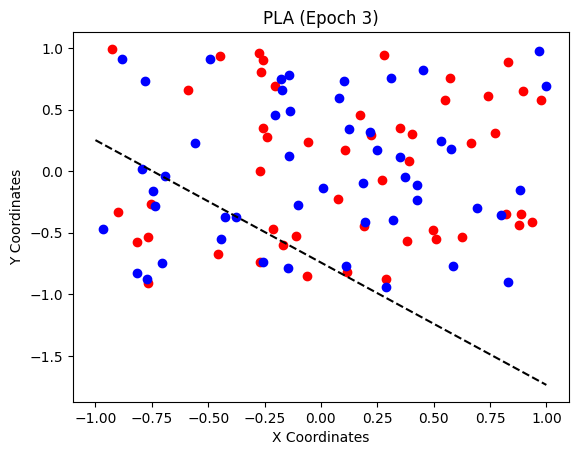

Epoch 4: Accuracy=0.53


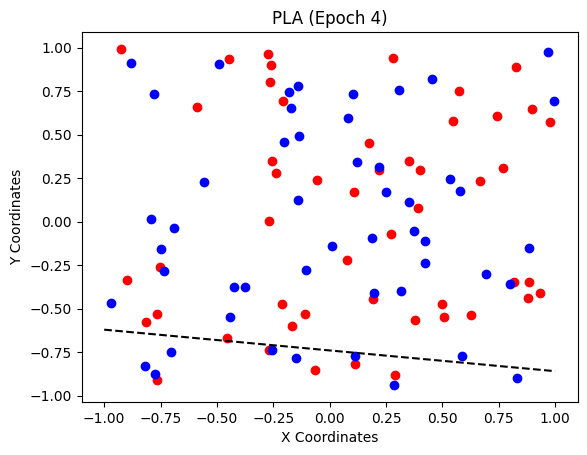

Epoch 5: Accuracy=0.5


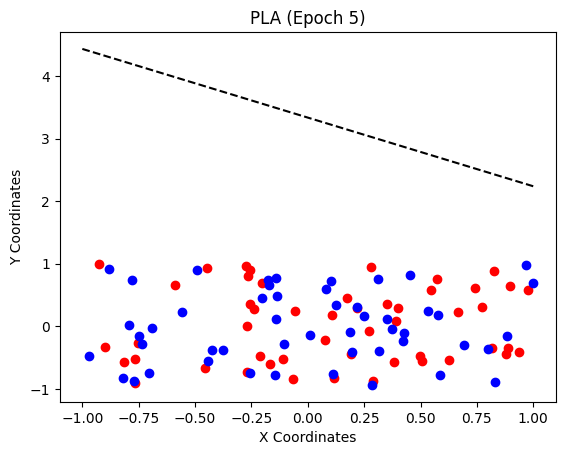

Epoch 6: Accuracy=0.49


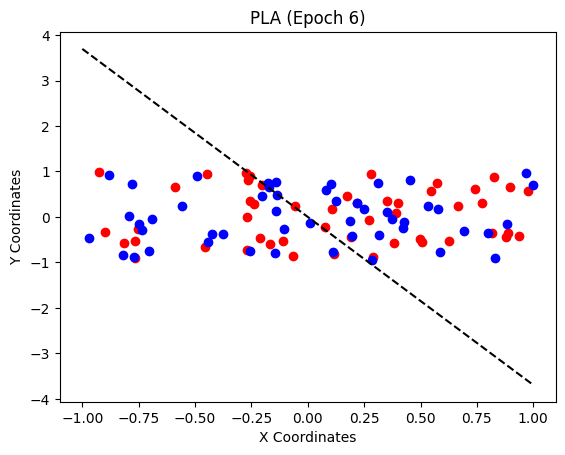

Epoch 7: Accuracy=0.55


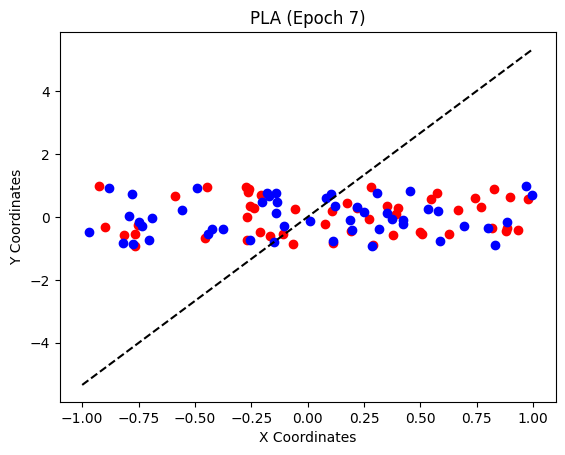

Epoch 8: Accuracy=0.5


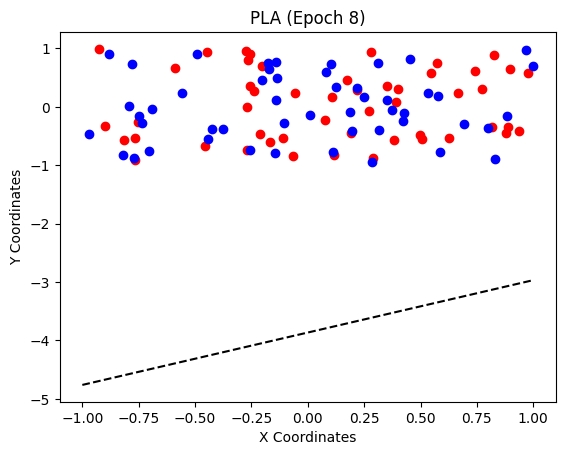

Epoch 9: Accuracy=0.5


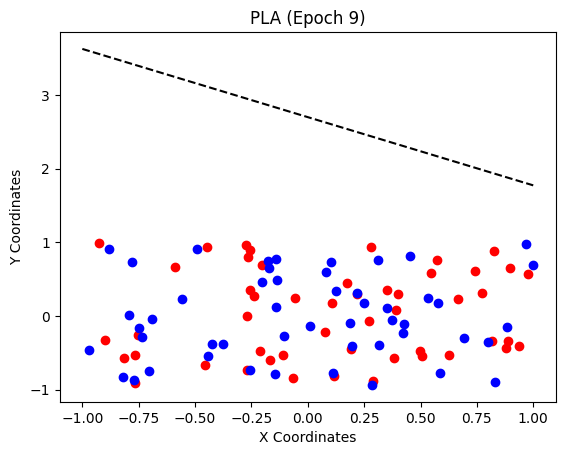

Epoch 10: Accuracy=0.53


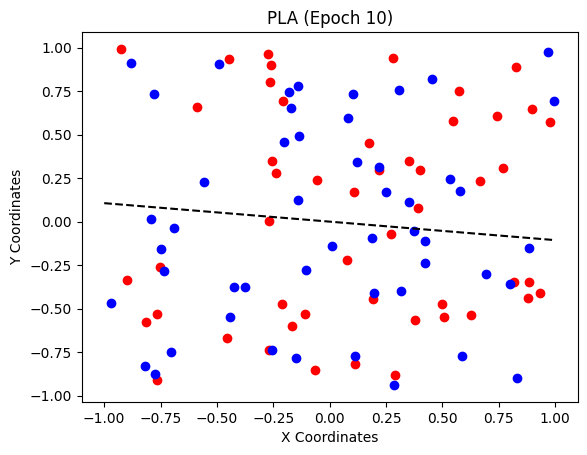

Epoch 11: Accuracy=0.52


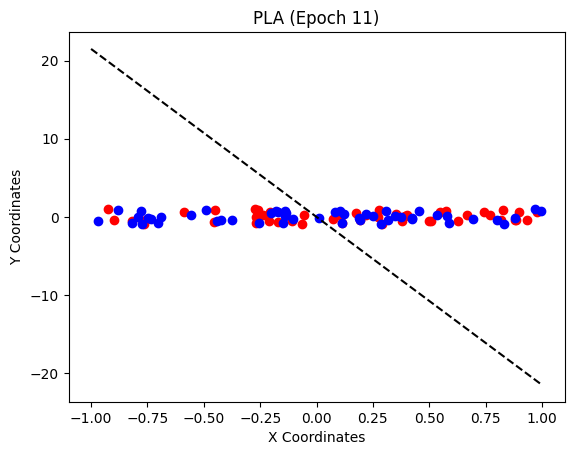

Epoch 12: Accuracy=0.5


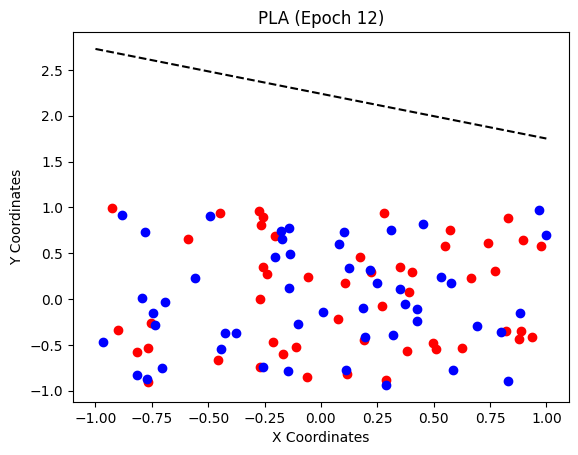

Epoch 13: Accuracy=0.5


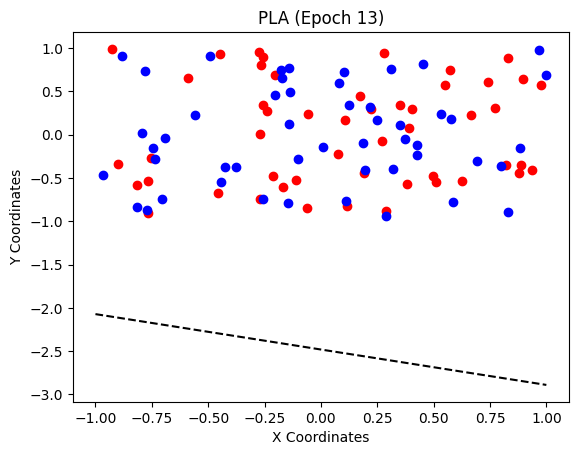

Epoch 14: Accuracy=0.51


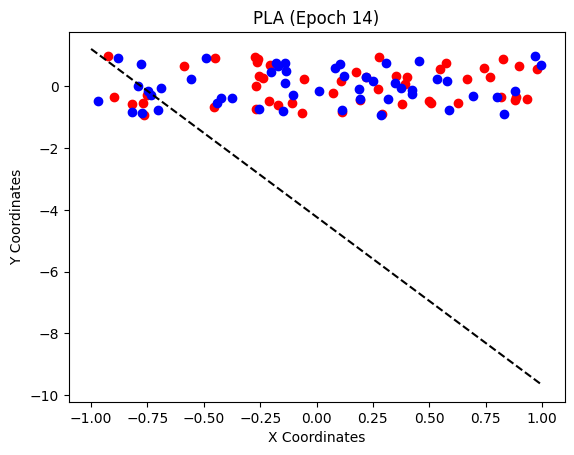

Epoch 15: Accuracy=0.5


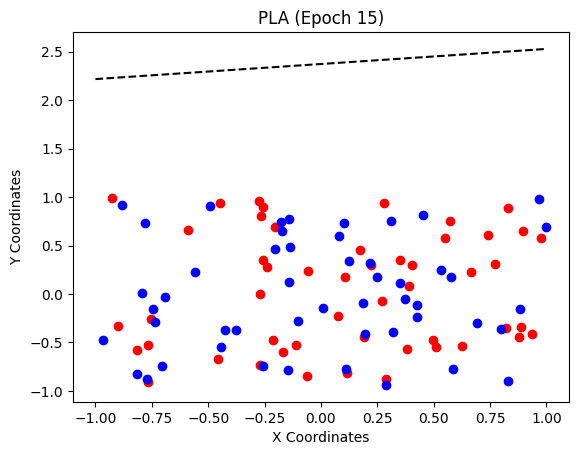

Epoch 16: Accuracy=0.5


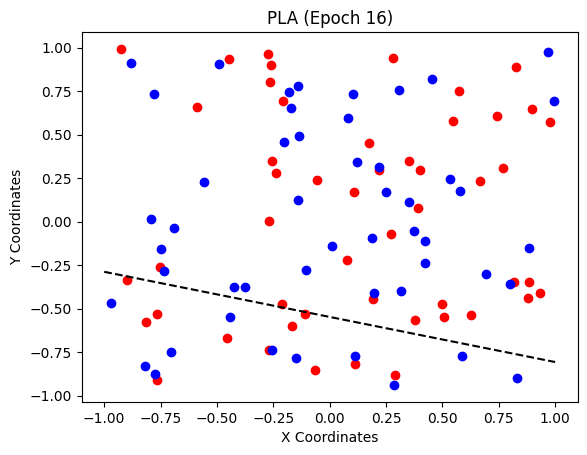

Epoch 17: Accuracy=0.53


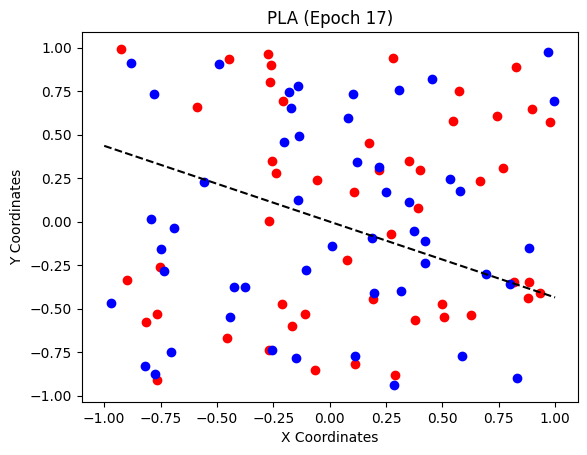

Epoch 18: Accuracy=0.46


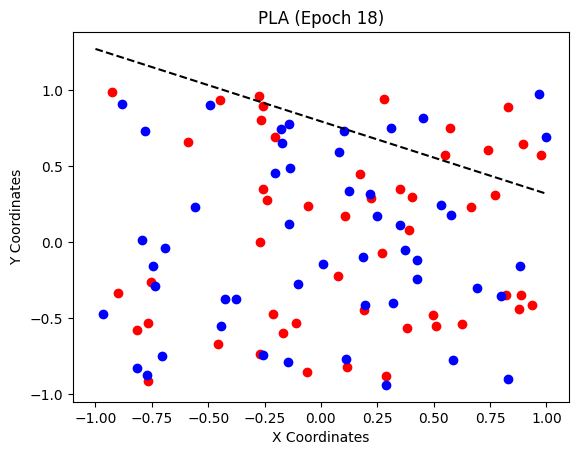

Epoch 19: Accuracy=0.52


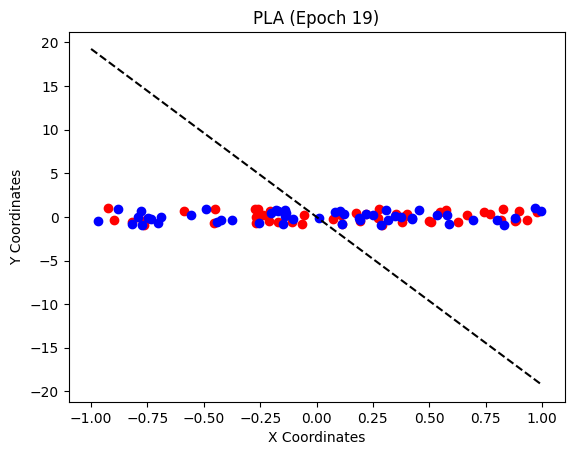

In [7]:
#pla algorithm
import random
import numpy as np
import matplotlib.pyplot as plt

group1 = [(random.uniform(-1, 1), random.uniform(-1, 1)) for _ in range(50)]
group2 = [(random.uniform(-1, 1), random.uniform(-1, 1)) for _ in range(50)]
data = np.array(group1 + group2)
data = np.insert(data, 0, 1, axis=1)
target = np.array([1] * 50 + [-1] * 50)
weights = np.zeros(3)
max_epochs = 20
learning_rate = 0.1
for epoch in range(max_epochs):
    shuffle_index = np.random.permutation(len(data))
    data = data[shuffle_index]
    target = target[shuffle_index]
    for i in range(len(data)):
        prediction = np.sign(np.dot(weights, data[i]))
        if prediction != target[i]:
            weights += learning_rate * target[i] * data[i]
    accuracy = np.mean(np.sign(np.dot(data, weights)) == target)
    print(f'Epoch {epoch}: Accuracy={accuracy}')
    if accuracy == 1.0:
        break
    x1, y1 = zip(*group1)
    x2, y2 = zip(*group2)
    plt.scatter(x1, y1, color='red')
    plt.scatter(x2, y2, color='blue')
    x_vals = np.array([-1, 1])
    y_vals = -(weights[0] + weights[1] * x_vals) / weights[2]
    plt.plot(x_vals, y_vals, linestyle='--', color='black')
    plt.title(f'PLA (Epoch {epoch})')
    plt.xlabel('X Coordinates')
    plt.ylabel('Y Coordinates')
    plt.show()

Epoch 0: Num updates=50, Accuracy=0.63
Epoch 1: Num updates=98, Accuracy=0.64
Epoch 2: Num updates=144, Accuracy=0.64
Epoch 3: Num updates=186, Accuracy=0.64
Epoch 4: Num updates=244, Accuracy=0.64
Epoch 5: Num updates=285, Accuracy=0.64
Epoch 6: Num updates=329, Accuracy=0.64
Epoch 7: Num updates=389, Accuracy=0.64
Epoch 8: Num updates=444, Accuracy=0.64
Epoch 9: Num updates=491, Accuracy=0.64
Epoch 10: Num updates=539, Accuracy=0.64
Epoch 11: Num updates=590, Accuracy=0.64
Epoch 12: Num updates=645, Accuracy=0.64
Epoch 13: Num updates=690, Accuracy=0.64
Epoch 14: Num updates=742, Accuracy=0.64
Epoch 15: Num updates=786, Accuracy=0.64
Epoch 16: Num updates=829, Accuracy=0.64
Epoch 17: Num updates=873, Accuracy=0.64
Epoch 18: Num updates=921, Accuracy=0.64
Epoch 19: Num updates=974, Accuracy=0.64
Epoch 20: Num updates=1022, Accuracy=0.64
Epoch 21: Num updates=1078, Accuracy=0.64
Epoch 22: Num updates=1134, Accuracy=0.64
Epoch 23: Num updates=1183, Accuracy=0.64
Epoch 24: Num updates=12

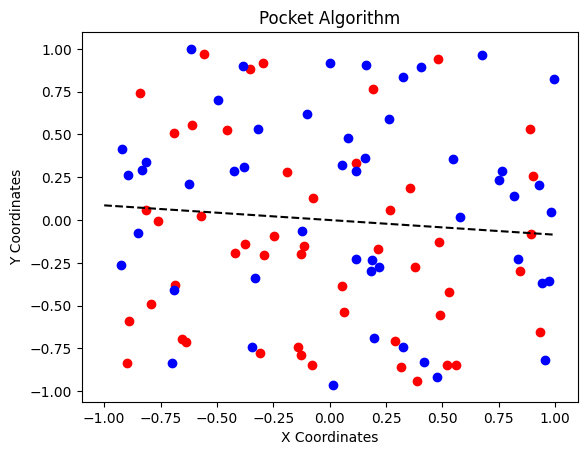

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt

group1 = [(random.uniform(-1, 1), random.uniform(-1, 1)) for _ in range(50)]
group2 = [(random.uniform(-1, 1), random.uniform(-1, 1)) for _ in range(50)]
data = np.array(group1 + group2)
data = np.insert(data, 0, 1, axis=1)
target = np.array([1] * 50 + [-1] * 50)
weights = np.zeros(3)
max_epochs = 10
learning_rate = 0.1
best_weights = np.zeros(3)
for epoch in range(max_epochs):
    shuffle_index = np.random.permutation(len(data))
    data = data[shuffle_index]
    target = target[shuffle_index]
    for i in range(len(data)):
        prediction = np.sign(np.dot(weights, data[i]))
        if prediction != target[i]:
            weights += learning_rate * target[i] * data[i]
            accuracy = np.mean(np.sign(np.dot(data, weights)) == target)
            if accuracy > np.mean(np.sign(np.dot(data, best_weights)) == target):
                best_weights = np.copy(weights)
            if accuracy == 1.0:
                break
    accuracy = np.mean(np.sign(np.dot(data, best_weights)) == target)
    print(f'Epoch {epoch}: Accuracy={accuracy}')
    if accuracy == 1.0:
        break
x1, y1 = zip(*group1)
x2, y2 = zip(*group2)
plt.scatter(x1, y1, color='red')
plt.scatter(x2, y2, color='blue')
x_vals = np.array([-1, 1])
y_vals = -(best_weights[0] + best_weights[1] * x_vals) / best_weights[2]
plt.plot(x_vals, y_vals, linestyle='--', color='black')
plt.title('Pocket Algorithm')
plt.show()